# WeatherPy


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


648

### Perform API Calls
* Performed a weather check on each city using a series of successive API calls.
* Included a print log of each city as it's being processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

city_group=[]
lat = []
lng = []
max_temp = []
hum=[]
cloud=[]
wind=[]
country=[]
date=[]

print("Beginning Data Retrieval\n---------------------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        max_temp.append(response['main']['temp_max'])
        city_group.append(response['name'])
        print(f"Processing Record {cities.index(city)} of Set 1 | {city}")  
        
    except(KeyError, IndexError):
        print("Missing field/result... skipping.")

print("---------------------------------------\nData Retrieval Complete\n---------------------------------------")

        

Beginning Data Retrieval
---------------------------------------
Processing Record 0 of Set 1 | chokurdakh
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | severo-kurilsk
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | khasan
Processing Record 5 of Set 1 | nishihara
Processing Record 6 of Set 1 | mehamn
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | rantepao
Processing Record 9 of Set 1 | krasnoselkup
Processing Record 10 of Set 1 | te anau
Processing Record 11 of Set 1 | laguna
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | geraldton
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | drayton valley
Processing Record 17 of Set 1 | caluquembe
Processing Record 18 of Set 1 | shubarshi
Processing Record 19 of Set 1 | sholapur
Processing Record 20 of Set 1 | abong mbang
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 

Processing Record 198 of Set 1 | mount gambier
Processing Record 199 of Set 1 | saint-pierre
Processing Record 200 of Set 1 | nome
Processing Record 201 of Set 1 | tuatapere
Missing field/result... skipping.
Missing field/result... skipping.
Processing Record 204 of Set 1 | airai
Processing Record 205 of Set 1 | asyut
Processing Record 206 of Set 1 | scarborough
Processing Record 207 of Set 1 | kamenka
Processing Record 208 of Set 1 | shenjiamen
Processing Record 209 of Set 1 | fort nelson
Processing Record 210 of Set 1 | souillac
Processing Record 211 of Set 1 | buraydah
Processing Record 212 of Set 1 | kaniama
Missing field/result... skipping.
Processing Record 214 of Set 1 | boueni
Processing Record 215 of Set 1 | atambua
Processing Record 216 of Set 1 | lamu
Processing Record 217 of Set 1 | margate
Processing Record 218 of Set 1 | novyy buyan
Processing Record 219 of Set 1 | sao desiderio
Processing Record 220 of Set 1 | ugoofaaru
Processing Record 221 of Set 1 | carutapera
Process

Processing Record 397 of Set 1 | port arthur
Processing Record 398 of Set 1 | kruisfontein
Processing Record 399 of Set 1 | shingu
Missing field/result... skipping.
Processing Record 401 of Set 1 | liberec
Processing Record 402 of Set 1 | ewa beach
Processing Record 403 of Set 1 | tual
Processing Record 404 of Set 1 | awbari
Processing Record 405 of Set 1 | jumla
Processing Record 406 of Set 1 | charters towers
Processing Record 407 of Set 1 | dawei
Processing Record 408 of Set 1 | muzhi
Processing Record 409 of Set 1 | shubarkuduk
Processing Record 410 of Set 1 | pacific grove
Processing Record 411 of Set 1 | shimoda
Processing Record 412 of Set 1 | saldanha
Processing Record 413 of Set 1 | hovd
Missing field/result... skipping.
Processing Record 415 of Set 1 | grindavik
Processing Record 416 of Set 1 | anisoc
Processing Record 417 of Set 1 | ornes
Processing Record 418 of Set 1 | piranshahr
Processing Record 419 of Set 1 | ahuimanu
Missing field/result... skipping.
Processing Record 

Missing field/result... skipping.
Processing Record 596 of Set 1 | azul
Processing Record 597 of Set 1 | kieta
Processing Record 598 of Set 1 | sola
Processing Record 599 of Set 1 | mosquera
Processing Record 600 of Set 1 | montale
Missing field/result... skipping.
Processing Record 602 of Set 1 | tatarsk
Processing Record 603 of Set 1 | port keats
Processing Record 604 of Set 1 | hay river
Processing Record 605 of Set 1 | praia
Processing Record 606 of Set 1 | catamarca
Processing Record 607 of Set 1 | buala
Missing field/result... skipping.
Processing Record 609 of Set 1 | aripuana
Processing Record 610 of Set 1 | kokopo
Processing Record 611 of Set 1 | gravdal
Processing Record 612 of Set 1 | agadez
Processing Record 613 of Set 1 | kitui
Processing Record 614 of Set 1 | hobyo
Processing Record 615 of Set 1 | kemi
Processing Record 616 of Set 1 | aras
Processing Record 617 of Set 1 | cururupu
Processing Record 618 of Set 1 | riyadh
Processing Record 619 of Set 1 | champasak
Processin

### Convert Raw Data to DataFrame
* Exported the city data into a .csv.
* Displayed the DataFrame

In [6]:
weather_dict = {
    "City": city_group,
    "Lat": lat,
    "Lng":lng,
    "Max Temp": max_temp,
    "Humidity" : hum,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date    
}


In [7]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.63,147.92,-27.67,85,9,1.36,RU,1607285827
1,Port Alfred,-33.59,26.89,68.99,87,100,23.62,ZA,1607285806
2,Severo-Kuril'sk,50.68,156.12,27.32,90,100,16.42,RU,1607285827
3,Mataura,-46.19,168.86,64.99,71,8,4.00,NZ,1607285827
4,Khasan,42.43,130.64,29.25,85,2,18.05,RU,1607285828
5,Nishihara,26.18,127.76,71.60,83,40,6.93,JP,1607285793
6,Mehamn,71.04,27.85,32.00,89,75,13.87,NO,1607285808
7,Barrow,71.29,-156.79,12.20,78,90,11.41,US,1607285702
8,Rantepao,-2.97,119.90,66.33,85,100,2.82,ID,1607285828
9,Krasnosel'kup,65.70,82.47,12.54,96,100,14.41,RU,1607285829


In [8]:
weather_data.to_csv("weather_data_df.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.

* No cities were found to have a humidity > 100%

In [9]:
hum_100 = weather_data.loc[weather_data["Humidity"] > 100, :]
hum_40 = weather_data.loc[weather_data['Cloudiness'] <= 40, :]
hum_neg40 = weather_data.loc[weather_data['Cloudiness'] >= -40, :]

In [10]:
#  Get the indices of cities that have humidity over 100%.
indexNames = weather_data[weather_data['Humidity'] > 100].index



list(hum_100.index)

[]

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_data.drop(indexNames , inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.63,147.92,-27.67,85,9,1.36,RU,1607285827
1,Port Alfred,-33.59,26.89,68.99,87,100,23.62,ZA,1607285806
2,Severo-Kuril'sk,50.68,156.12,27.32,90,100,16.42,RU,1607285827
3,Mataura,-46.19,168.86,64.99,71,8,4.00,NZ,1607285827
4,Khasan,42.43,130.64,29.25,85,2,18.05,RU,1607285828


In [12]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

clean_city_data.to_csv("clean_city.csv", encoding="utf-8", index=False)

## Plotting the Data

* Plot analysis results including title and axes labels
* Saved the plotted figures as .pngs.

## Latitude vs. Temperature Plot

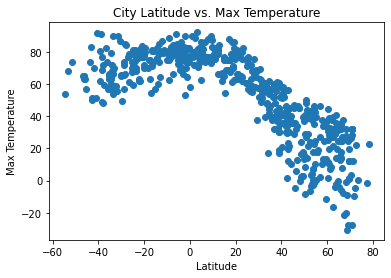

In [13]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs. Max Temperature')
plt.show()

In [14]:
plt.savefig('lat_maxtemp')

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

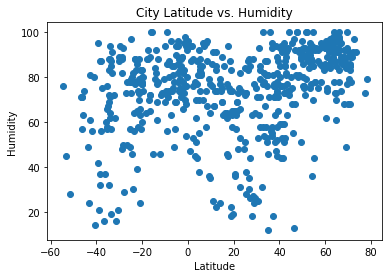

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')
plt.show()
plt.savefig('lat_humidity')

## Latitude vs. Cloudiness Plot

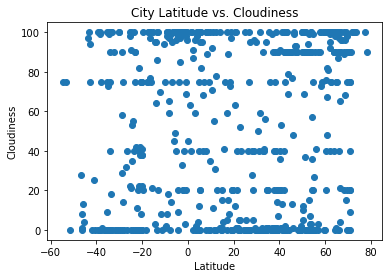

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.show()
plt.savefig('lat_cloudiness')

## Latitude vs. Wind Speed Plot

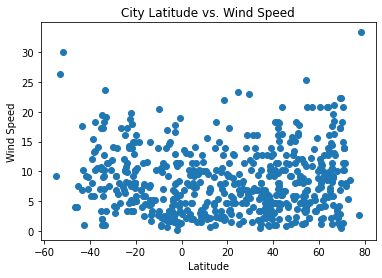

<Figure size 432x288 with 0 Axes>

In [18]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')
plt.show()
plt.savefig('lat_windspeed')

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [19]:
# Create Northern and Southern Hemisphere DataFrames
north_hem = weather_data.loc[weather_data["Lat"] > 0, :]
north_hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chokurdakh,70.63,147.92,-27.67,85,9,1.36,RU,1607285827
2,Severo-Kuril'sk,50.68,156.12,27.32,90,100,16.42,RU,1607285827
4,Khasan,42.43,130.64,29.25,85,2,18.05,RU,1607285828
5,Nishihara,26.18,127.76,71.60,83,40,6.93,JP,1607285793
6,Mehamn,71.04,27.85,32.00,89,75,13.87,NO,1607285808
...,...,...,...,...,...,...,...,...,...
584,Ferkessédougou,9.60,-5.20,83.12,35,35,3.04,CI,1607285969
585,San Policarpo,12.18,125.51,81.48,85,100,6.49,PH,1607285969
586,Haines Junction,60.75,-137.51,10.40,85,100,1.95,CA,1607285917
587,Tabas,33.60,56.92,48.20,87,56,1.81,IR,1607285970


In [20]:
south_hem = weather_data.loc[weather_data["Lat"] < 0, :]
south_hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Port Alfred,-33.59,26.89,68.99,87,100,23.62,ZA,1607285806
3,Mataura,-46.19,168.86,64.99,71,8,4.00,NZ,1607285827
8,Rantepao,-2.97,119.90,66.33,85,100,2.82,ID,1607285828
10,Te Anau,-45.42,167.72,56.66,74,4,7.61,NZ,1607285829
13,Geraldton,-28.77,114.60,57.20,82,0,9.17,AU,1607285829
...,...,...,...,...,...,...,...,...,...
573,Japura,-0.32,102.35,73.58,92,100,1.41,ID,1607285967
577,Kiama,-34.68,150.87,63.00,69,0,1.99,AU,1607285967
579,Tiarei,-17.53,-149.33,75.20,88,75,6.93,PF,1607285968
581,Fare,-16.70,-151.02,81.46,72,100,11.39,PF,1607285807


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

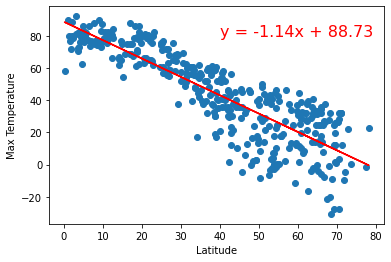

The r-squared is: 0.7307082150795542


In [21]:
from scipy import stats

x_values = north_hem['Lat']
y_values = north_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,80),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

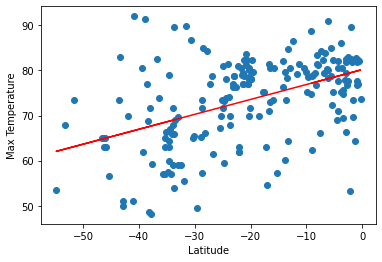

The r-squared is: 0.21931787981829276


In [22]:
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

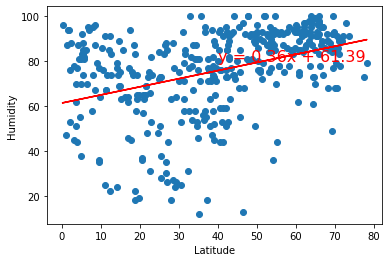

The r-squared is: 0.15168099597310436


In [23]:
x_values = north_hem['Lat']
y_values = north_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,80),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

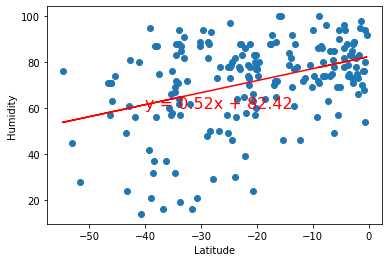

The r-squared is: 0.14894467824948088


In [24]:
x_values = south_hem['Lat']
y_values = south_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,60),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

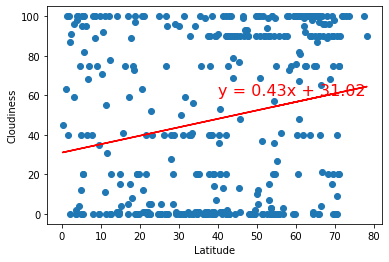

The r-squared is: 0.044220008500787805


In [25]:
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,60),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

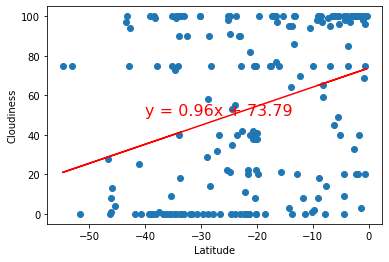

The r-squared is: 0.10112281901355356


In [26]:
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,50),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

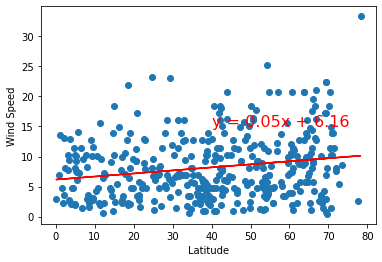

The r-squared is: 0.038738654345847834


In [27]:
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

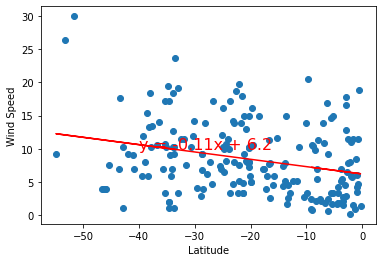

The r-squared is: 0.07693127364883388


In [28]:
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=16,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

print(f"The r-squared is: {rvalue**2}")